In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
plt.style.use('lateky')
import numpy as np
import pickle

In [2]:
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12

Finding the X-point

Initial guess: [6.21560891, -4.46981856]
0 - [DeltaR, DeltaZ] : [0.36812511 0.29366272] - dtheta : 0.10118852692377112
0 - [StepR, StepZ]: [-0.0236111  -0.02026723]
1 - RZ : [ 6.19199781 -4.49008579] - rhotheta : [ 3.80289834 -1.6292324 ]
1 - [DeltaR, DeltaZ] : [-0.161072  -0.1732541] - dtheta : 0.03779092306370524
1 - [StepR, StepZ]: [0.00559025 0.00256556]
2 - RZ : [ 6.19758806 -4.48752024] - rhotheta : [ 3.80001455 -1.62780323]
2 - [DeltaR, DeltaZ] : [-0.01704153 -0.02901229] - dtheta : 0.004010692884596656
2 - [StepR, StepZ]: [ 0.00597728 -0.00824633]
3 - RZ : [ 6.20356534 -4.49576657] - rhotheta : [ 3.80791237 -1.62611269]
3 - [DeltaR, DeltaZ] : [0.00039688 0.00018237] - dtheta : 0.00010142199555973619
3 - [StepR, StepZ]: [ 5.74398542e-05 -1.32091785e-04]
4 - RZ : [ 6.20362278 -4.49589866] - rhotheta

In [3]:
iparams = dict()
iparams["rtol"] = 1e-10

# set up the Poincare plot
pparams = dict()
pparams["nPtrj"] = 50
pparams["nPpts"] = 100
pparams["zeta"] = 0
pparams["Rbegin"] = pyoproblem._R0+1e-3
pparams["Rend"] = 9.2

pplot = PoincarePlot(pyoproblem, pparams, integrator_params=iparams)

# # R-only computation
pplot.compute()

In [4]:
pplot.compute_iota()

array([0.67150907, 0.66928516, 0.66527047, 0.65955626, 0.65220405,
       0.64335126, 0.63309997, 0.62159268, 0.60899945, 0.59544888,
       0.58108814, 0.56611587, 0.55061711, 0.53478642, 0.5187234 ,
       0.50255568, 0.48637501, 0.47026131, 0.45432925, 0.43863426,
       0.42321405, 0.40815369, 0.39343883, 0.37914389, 0.36526156,
       0.35179516, 0.33879404, 0.32622464, 0.31407186, 0.302358  ,
       0.29106517, 0.28017981, 0.26967703, 0.25953136, 0.24971461,
       0.2401915 , 0.2309185 , 0.22183613, 0.21285015, 0.20379241,
       0.19432713, 0.18352932, 0.1657846 , 0.15231335, 0.16156379,
       0.16533924, 0.16682187, 0.16700717, 0.16633006, 0.16507938,
       0.16339181])

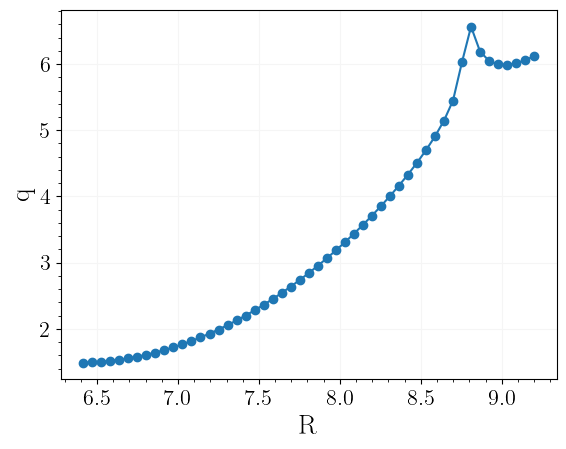

In [8]:
pplot.plot_q(marker='o')

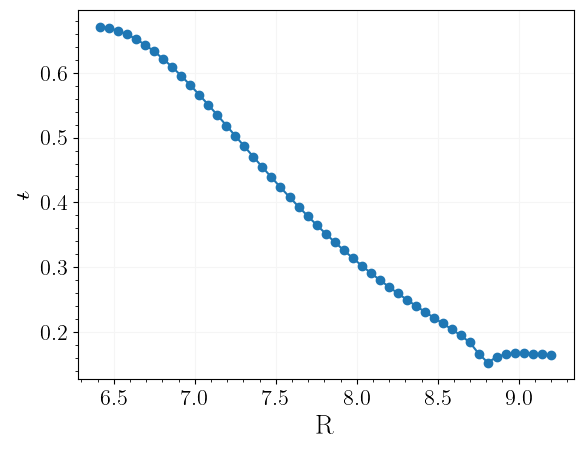

In [9]:
pplot.plot_iota(marker='o')